In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad("/Users/cyluo/Library/CloudStorage/Box-Box/MERFISH Collaboration 3/clustering3/h5ad files/zenodo/merscope_integrated_855.h5ad")
filtered_adata = adata[adata.obs['H1_annotation'].isin(["EN-IT", "EN-ET", "EN-Mig"])]

/Users/cyluo/anaconda3/envs/xuyuEnv/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
filtered_adata = filtered_adata[~filtered_adata.obs['sample'].isna() & ~filtered_adata.obs['region'].isna()].copy()
filtered_adata.obs['sample'] = filtered_adata.obs['sample'].astype(str)
filtered_adata.obs['region'] = filtered_adata.obs['region'].astype(str)
filtered_adata.obs['sample_region'] = filtered_adata.obs['sample'] + '-' + filtered_adata.obs['region']
print(filtered_adata.obs[['sample', 'region', 'sample_region']].head())

/Users/cyluo/anaconda3/envs/xuyuEnv/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


                    sample region sample_region
2241155200012100016  FB080     F1      FB080-F1
2241155200012100018  FB080     F1      FB080-F1
2241155200012100021  FB080     F1      FB080-F1
2241155200012100028  FB080     F1      FB080-F1
2241155200012100030  FB080     F1      FB080-F1


In [10]:
cortical_area = pd.read_excel("cortical_area.xlsx")

In [11]:
merged_encluster = filtered_adata.obs.merge(cortical_area, on='sample_region')

In [12]:
merged_encluster_ca = merged_encluster.groupby('cortical_area').size().reset_index(name='ca_count')
merged_encluster_ca.to_csv("encluster_ca.csv", index=False)
print(merged_encluster_ca.head())

  cortical_area  ca_count
0          Occi   2709245
1           PFC   1955971
2        PMC/M1    822868
3           Par   2568061
4          Temp    809531


In [14]:
merged_encluster_ca['cortical_area'] = pd.Categorical(
    merged_encluster_ca['cortical_area'],
    categories=["PFC", "PMC/M1", "Par", "Temp", "Occi"],
    ordered=True
    )
print(merged_encluster_ca)

  cortical_area  ca_count
0          Occi   2709245
1           PFC   1955971
2        PMC/M1    822868
3           Par   2568061
4          Temp    809531


In [15]:
labels = merged_encluster_ca['cortical_area']
sizes = merged_encluster_ca['ca_count']
colors = ["red", "yellow", "cyan", "coral", "royalblue"]

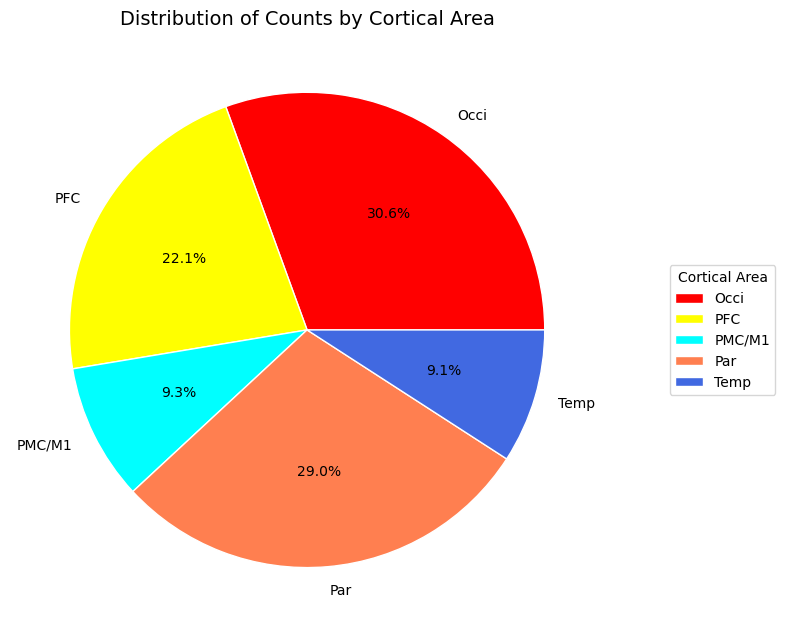

In [ ]:
plt.figure(figsize=(8, 8))  
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  
    startangle=0,     
    wedgeprops={"edgecolor": "white"}  
    )
plt.legend(title="Cortical Area", loc="right", bbox_to_anchor=(1.3, 0.5))
plt.title("Distribution of Counts by Cortical Area", fontsize=14, ha="center")

plt.tight_layout()
plt.savefig("Cortical_Area_Pie_Chart.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()